In [34]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None) 
import pandasql as psql


In [35]:
FRAUD = pd.read_csv(r"E:\PROJECT ALML\NEW ONE PROJECT\Fraud Extract_Migrated Data.csv", header=0)  
#FRAUD_bk = FRAUD.copy()
FRAUD .head()

,Benfords Number,Broker,Business Name,Business Unit,City,Claim ID,Claims Handler,D_BU_LOB,Division,Entity of Interest,Event Date,Fraud Sub-Class,ISO ClaimSearch Flag,LOB Description,Parameter Dimension,Policy ID,Policy Limit Group,State,Benford Target,EOI Paid,Fraud Claim Amount,Non-EOI Paid,Number of Records,PaidClaimAmount,Parameter Measure,Policy Limit,Std Dev,Total Loss Short
0,2,Topicware,Feedspan,Accident,HAMDEN,130540,Aguistin McQuaid,Accident & HealthAccidentDisability,Accident & Health,0,1/1/2011 12:00:00 PM,0,NON-FRAUD,Disability,10000,10000,20M-50M,CT,17.60%,0.0,0.0,2059.14,1,"$2,059",2059.14,20000000.0,NaN,$0
1,1,Babbleopia,Tazzy,Residential,ASHEVILLE,33507,Lizabeth Humerstone,PropertyResidentialFire,Property,0,1/1/2011 12:00:00 PM,0,NON-FRAUD,Fire,10406,10406,2M-7M,NC,30.10%,0.0,0.0,1750.00,1,"$1,750",1750.00,5000000.0,NaN,$0
2,1,Oloo,Reallinks,Commercial Property,CAMBRIDGE,97015,Darrell Jaszczak,PropertyCommercial PropertyDomestic,Property,0,1/1/2011 12:00:00 PM,0,NON-FRAUD,Domestic,9033,9033,7M-20M,MA,30.10%,0.0,0.0,133075.87,1,"$133,076",133075.87,10000000.0,NaN,$0
3,3,Topicware,Wordware,Cyber,IDAHO FALLS,177724,Aguistin McQuaid,TechnologyCyberTerrorism,Technology,0,1/1/2011 12:00:00 PM,0,NON-FRAUD,Terrorism,10235,10235,20M-50M,ID,12.50%,0.0,0.0,3459.77,1,"$3,460",3459.77,25000000.0,NaN,$0
4,5,Topicware,Yata,Privacy,BRANFORD,62808,Aguistin McQuaid,TechnologyPrivacyGeneral Liability,Technology,0,1/1/2011 12:00:00 PM,0,NON-FRAUD,General Liability,10330,10330,20M-50M,CT,7.90%,0.0,0.0,5191.99,1,"$5,192",5191.99,20000000.0,NaN,$0


In [36]:
FRAUD .shape

(34101, 28)

In [37]:
FRAUD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34101 entries, 0 to 34100
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Benfords Number       34101 non-null  int64  
 1   Broker                34101 non-null  object 
 2   Business Name         34101 non-null  object 
 3   Business Unit         34101 non-null  object 
 4   City                  34101 non-null  object 
 5   Claim ID              34101 non-null  int64  
 6   Claims Handler        34101 non-null  object 
 7   D_BU_LOB              34101 non-null  object 
 8   Division              34101 non-null  object 
 9   Entity of Interest    34101 non-null  int64  
 10  Event Date            34101 non-null  object 
 11  Fraud Sub-Class       34101 non-null  int64  
 12  ISO ClaimSearch Flag  34101 non-null  object 
 13  LOB Description       34101 non-null  object 
 14  Parameter Dimension   34101 non-null  int64  
 15  Policy ID          

In [38]:
FRAUD["Policy ID"].value_counts()

9820     1153
10330     586
10000     488
7383      472
10235     391
         ... 
6507        1
6954        1
8010        1
10976       1
9466        1
Name: Policy ID, Length: 6503, dtype: int64

In [39]:
FRAUD.duplicated().sum()

0

In [40]:
del FRAUD["Std Dev"]
del FRAUD["Claim ID"]
del FRAUD["Event Date"]

In [41]:
FRAUD.head()

,Benfords Number,Broker,Business Name,Business Unit,City,Claims Handler,D_BU_LOB,Division,Entity of Interest,Fraud Sub-Class,ISO ClaimSearch Flag,LOB Description,Parameter Dimension,Policy ID,Policy Limit Group,State,Benford Target,EOI Paid,Fraud Claim Amount,Non-EOI Paid,Number of Records,PaidClaimAmount,Parameter Measure,Policy Limit,Total Loss Short
0,2,Topicware,Feedspan,Accident,HAMDEN,Aguistin McQuaid,Accident & HealthAccidentDisability,Accident & Health,0,0,NON-FRAUD,Disability,10000,10000,20M-50M,CT,17.60%,0.0,0.0,2059.14,1,"$2,059",2059.14,20000000.0,$0
1,1,Babbleopia,Tazzy,Residential,ASHEVILLE,Lizabeth Humerstone,PropertyResidentialFire,Property,0,0,NON-FRAUD,Fire,10406,10406,2M-7M,NC,30.10%,0.0,0.0,1750.00,1,"$1,750",1750.00,5000000.0,$0
2,1,Oloo,Reallinks,Commercial Property,CAMBRIDGE,Darrell Jaszczak,PropertyCommercial PropertyDomestic,Property,0,0,NON-FRAUD,Domestic,9033,9033,7M-20M,MA,30.10%,0.0,0.0,133075.87,1,"$133,076",133075.87,10000000.0,$0
3,3,Topicware,Wordware,Cyber,IDAHO FALLS,Aguistin McQuaid,TechnologyCyberTerrorism,Technology,0,0,NON-FRAUD,Terrorism,10235,10235,20M-50M,ID,12.50%,0.0,0.0,3459.77,1,"$3,460",3459.77,25000000.0,$0
4,5,Topicware,Yata,Privacy,BRANFORD,Aguistin McQuaid,TechnologyPrivacyGeneral Liability,Technology,0,0,NON-FRAUD,General Liability,10330,10330,20M-50M,CT,7.90%,0.0,0.0,5191.99,1,"$5,192",5191.99,20000000.0,$0


In [42]:
FRAUD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34101 entries, 0 to 34100
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Benfords Number       34101 non-null  int64  
 1   Broker                34101 non-null  object 
 2   Business Name         34101 non-null  object 
 3   Business Unit         34101 non-null  object 
 4   City                  34101 non-null  object 
 5   Claims Handler        34101 non-null  object 
 6   D_BU_LOB              34101 non-null  object 
 7   Division              34101 non-null  object 
 8   Entity of Interest    34101 non-null  int64  
 9   Fraud Sub-Class       34101 non-null  int64  
 10  ISO ClaimSearch Flag  34101 non-null  object 
 11  LOB Description       34101 non-null  object 
 12  Parameter Dimension   34101 non-null  int64  
 13  Policy ID             34101 non-null  int64  
 14  Policy Limit Group    34101 non-null  object 
 15  State              

In [43]:
# Display Descriptive Statistics

FRAUD.describe()

,Benfords Number,Entity of Interest,Fraud Sub-Class,Parameter Dimension,Policy ID,EOI Paid,Fraud Claim Amount,Non-EOI Paid,Number of Records,Parameter Measure,Policy Limit
count,34101.000000,34101.000000,34101.000000,34101.000000,34101.000000,3.410100e+04,3.410100e+04,3.410100e+04,34101.0,3.410100e+04,3.410100e+04
mean,3.439401,0.484179,0.132929,7730.358875,7730.358875,1.538481e+04,2.653759e+03,1.833609e+04,1.0,3.372090e+04,3.121648e+07
std,2.399634,0.499757,0.539589,2078.264968,2078.264968,9.166145e+04,4.921312e+04,9.953953e+04,0.0,1.332131e+05,1.640782e+08
min,1.000000,0.000000,0.000000,4836.000000,4836.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0,5.020000e+00,0.000000e+00
25%,1.000000,0.000000,0.000000,6026.000000,6026.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.0,8.560400e+02,1.000000e+06
50%,3.000000,0.000000,0.000000,7464.000000,7464.000000,0.000000e+00,0.000000e+00,1.560200e+02,1.0,4.433780e+03,5.000000e+06
75%,5.000000,1.000000,0.000000,9621.000000,9621.000000,2.867710e+03,0.000000e+00,5.838050e+03,1.0,2.058000e+04,2.000000e+07
max,9.000000,1.000000,3.000000,12504.000000,12504.000000,4.598026e+06,4.249523e+06,8.643371e+06,1.0,8.643371e+06,5.221800e+09


In [44]:
FRAUD.duplicated().any()

False

In [45]:
# Count the missing values by each variable, if available

FRAUD.isnull().sum()

Benfords Number         0
Broker                  0
Business Name           0
Business Unit           0
City                    0
Claims Handler          0
D_BU_LOB                0
Division                0
Entity of Interest      0
Fraud Sub-Class         0
ISO ClaimSearch Flag    0
LOB Description         0
Parameter Dimension     0
Policy ID               0
Policy Limit Group      0
State                   0
Benford Target          0
EOI Paid                0
Fraud Claim Amount      0
Non-EOI Paid            0
Number of Records       0
PaidClaimAmount         0
Parameter Measure       0
Policy Limit            0
Total Loss Short        0
dtype: int64

In [46]:
FRAUD = FRAUD.rename(columns = {'ISO ClaimSearch Flag': 'claimsf'}, inplace = False)

In [47]:
# Display the 'purpose' variable by sub-variable count

FRAUD['claimsf'].value_counts()

NON-FRAUD                31831
ISO ClaimSearch FRAUD     2270
Name: claimsf, dtype: int64

In [48]:
# Replace target variable 'Deposit', 'Yes' to 1 and 'No' to 0 and # convert the 'y' to integer value.

FRAUD['claimsf'] = FRAUD['claimsf'].str.replace('NON-FRAUD', '1')
FRAUD['claimsf'] = FRAUD['claimsf'].str.replace('ISO ClaimSearch FRAUD', '0')
FRAUD['claimsf'] = FRAUD['claimsf'].astype(int)

In [49]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (>= 10 : 1, then the dataset is imbalance dataset)
                    
FRAUD_count = FRAUD.claimsf.value_counts()
print('Class 0:', FRAUD_count[0])
print('Class 1:', FRAUD_count[1])
print('Proportion:', round(FRAUD_count[0] / FRAUD_count[1], 2), ': 1')
print('Total loans Trans:', len(FRAUD))

Class 0: 2270
Class 1: 31831
Proportion: 0.07 : 1
Total loans Trans: 34101


In [50]:
FRAUD.head()

,Benfords Number,Broker,Business Name,Business Unit,City,Claims Handler,D_BU_LOB,Division,Entity of Interest,Fraud Sub-Class,claimsf,LOB Description,Parameter Dimension,Policy ID,Policy Limit Group,State,Benford Target,EOI Paid,Fraud Claim Amount,Non-EOI Paid,Number of Records,PaidClaimAmount,Parameter Measure,Policy Limit,Total Loss Short
0,2,Topicware,Feedspan,Accident,HAMDEN,Aguistin McQuaid,Accident & HealthAccidentDisability,Accident & Health,0,0,1,Disability,10000,10000,20M-50M,CT,17.60%,0.0,0.0,2059.14,1,"$2,059",2059.14,20000000.0,$0
1,1,Babbleopia,Tazzy,Residential,ASHEVILLE,Lizabeth Humerstone,PropertyResidentialFire,Property,0,0,1,Fire,10406,10406,2M-7M,NC,30.10%,0.0,0.0,1750.00,1,"$1,750",1750.00,5000000.0,$0
2,1,Oloo,Reallinks,Commercial Property,CAMBRIDGE,Darrell Jaszczak,PropertyCommercial PropertyDomestic,Property,0,0,1,Domestic,9033,9033,7M-20M,MA,30.10%,0.0,0.0,133075.87,1,"$133,076",133075.87,10000000.0,$0
3,3,Topicware,Wordware,Cyber,IDAHO FALLS,Aguistin McQuaid,TechnologyCyberTerrorism,Technology,0,0,1,Terrorism,10235,10235,20M-50M,ID,12.50%,0.0,0.0,3459.77,1,"$3,460",3459.77,25000000.0,$0
4,5,Topicware,Yata,Privacy,BRANFORD,Aguistin McQuaid,TechnologyPrivacyGeneral Liability,Technology,0,0,1,General Liability,10330,10330,20M-50M,CT,7.90%,0.0,0.0,5191.99,1,"$5,192",5191.99,20000000.0,$0


In [51]:
FRAUD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34101 entries, 0 to 34100
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Benfords Number      34101 non-null  int64  
 1   Broker               34101 non-null  object 
 2   Business Name        34101 non-null  object 
 3   Business Unit        34101 non-null  object 
 4   City                 34101 non-null  object 
 5   Claims Handler       34101 non-null  object 
 6   D_BU_LOB             34101 non-null  object 
 7   Division             34101 non-null  object 
 8   Entity of Interest   34101 non-null  int64  
 9   Fraud Sub-Class      34101 non-null  int64  
 10  claimsf              34101 non-null  int32  
 11  LOB Description      34101 non-null  object 
 12  Parameter Dimension  34101 non-null  int64  
 13  Policy ID            34101 non-null  int64  
 14  Policy Limit Group   34101 non-null  object 
 15  State                34101 non-null 

In [55]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

FRAUD['Broker'] = LE.fit_transform(FRAUD[['Broker']])
FRAUD['Business Name'] = LE.fit_transform(FRAUD[['Business Name']])
FRAUD['Business Unit'] = LE.fit_transform(FRAUD[['Business Unit']])
FRAUD['City'] = LE.fit_transform(FRAUD[['City']])
FRAUD['Claims Handler'] = LE.fit_transform(FRAUD[['Claims Handler']])
FRAUD['D_BU_LOB'] = LE.fit_transform(FRAUD[['D_BU_LOB']])
FRAUD['Division'] = LE.fit_transform(FRAUD[['Division']])
FRAUD['LOB Description'] = LE.fit_transform(FRAUD[['LOB Description']])
FRAUD['Policy Limit Group'] = LE.fit_transform(FRAUD[['Policy Limit Group']])
FRAUD['State'] = LE.fit_transform(FRAUD[['State']])
FRAUD['Benford Target'] = LE.fit_transform(FRAUD[['Benford Target']])
FRAUD['PaidClaimAmount'] = LE.fit_transform(FRAUD[['PaidClaimAmount']])
FRAUD['Total Loss Short'] = LE.fit_transform(FRAUD[['Total Loss Short']])


In [56]:
FRAUD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34101 entries, 0 to 34100
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Benfords Number      34101 non-null  int64  
 1   Broker               34101 non-null  int64  
 2   Business Name        34101 non-null  int32  
 3   Business Unit        34101 non-null  int32  
 4   City                 34101 non-null  int32  
 5   Claims Handler       34101 non-null  int32  
 6   D_BU_LOB             34101 non-null  int32  
 7   Division             34101 non-null  int32  
 8   Entity of Interest   34101 non-null  int64  
 9   Fraud Sub-Class      34101 non-null  int64  
 10  claimsf              34101 non-null  int32  
 11  LOB Description      34101 non-null  int32  
 12  Parameter Dimension  34101 non-null  int64  
 13  Policy ID            34101 non-null  int64  
 14  Policy Limit Group   34101 non-null  int32  
 15  State                34101 non-null 

In [57]:
FRAUD.head()

,Benfords Number,Broker,Business Name,Business Unit,City,Claims Handler,D_BU_LOB,Division,Entity of Interest,Fraud Sub-Class,claimsf,LOB Description,Parameter Dimension,Policy ID,Policy Limit Group,State,Benford Target,EOI Paid,Fraud Claim Amount,Non-EOI Paid,Number of Records,PaidClaimAmount,Parameter Measure,Policy Limit,Total Loss Short
0,2,289,103,0,192,4,1,0,0,0,1,7,10000,10000,0,5,1,0.0,0.0,2059.14,1,5047,2059.14,20000000.0,0
1,1,15,292,11,18,114,21,2,0,0,1,11,10406,10406,1,25,2,0.0,0.0,1750.00,1,783,1750.00,5000000.0,0
2,1,192,239,1,80,40,17,2,0,0,1,9,9033,9033,2,17,2,0.0,0.0,133075.87,1,2909,133075.87,10000000.0,0
3,3,289,347,4,213,4,28,3,0,0,1,32,10235,10235,0,11,0,0.0,0.0,3459.77,1,8304,3459.77,25000000.0,0
4,5,289,356,10,61,4,32,3,0,0,1,14,10330,10330,0,5,7,0.0,0.0,5191.99,1,11805,5191.99,20000000.0,0


In [59]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in FRAUD.columns:
    if col != 'claimsf':
        IndepVar.append(col)

TargetVar = 'claimsf'

x = FRAUD[IndepVar]
y = FRAUD[TargetVar]

In [60]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((23870, 24), (10231, 24), (23870,), (10231,))

In [61]:
# Display all the variable in the loan dataset

FRAUD.columns

Index(['Benfords Number', 'Broker', 'Business Name', 'Business Unit', 'City',
       'Claims Handler', 'D_BU_LOB', 'Division', 'Entity of Interest',
       'Fraud Sub-Class', 'claimsf', 'LOB Description', 'Parameter Dimension',
       'Policy ID', 'Policy Limit Group', 'State', 'Benford Target',
       'EOI Paid', 'Fraud Claim Amount', 'Non-EOI Paid', 'Number of Records',
       'PaidClaimAmount', 'Parameter Measure', 'Policy Limit',
       'Total Loss Short'],
      dtype='object')

In [62]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
#x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
#x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [63]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.500,0.463889,0.528796,0.636364,0.042129,0.126374,0.097561,0.00,0.0,0.0,0.53125,0.448357,0.448357,0.50,0.187500,0.875,0.000000,0.000000,0.000619,0.0,0.685760,0.000618,0.001436,0.0
1,0.000,0.922222,0.350785,0.818182,0.035477,0.697802,1.000000,1.00,0.0,0.0,0.81250,0.629238,0.629238,0.25,0.854167,0.250,0.000000,0.000000,0.002233,0.0,0.275420,0.002233,0.000479,0.0
2,0.250,0.647222,0.269634,1.000000,0.920177,0.576923,0.536585,0.50,0.0,0.0,0.40625,0.751565,0.751565,0.50,0.166667,0.000,0.000000,0.000000,0.003934,0.0,0.534852,0.003933,0.001915,0.0
3,0.000,0.802778,0.253927,0.909091,0.742794,0.021978,0.804878,0.75,0.0,0.0,0.62500,0.673448,0.673448,0.00,0.041667,0.250,0.000000,0.000000,0.000141,0.0,0.013803,0.000140,0.003830,0.0
4,0.125,0.463889,0.028796,0.636364,0.172949,0.126374,0.048780,0.00,0.0,0.0,0.31250,0.376891,0.376891,0.75,0.916667,0.125,0.000000,0.000000,0.003124,0.0,0.427019,0.003124,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865,0.000,0.691667,0.759162,0.636364,0.687361,0.126374,0.048780,0.00,1.0,0.0,0.31250,0.020214,0.020214,1.00,0.187500,0.250,0.000042,0.000000,0.000000,0.0,0.283586,0.000022,0.011490,0.0
23866,0.125,0.041667,0.685864,0.272727,0.104213,0.109890,0.243902,0.25,0.0,0.0,0.84375,0.576813,0.576813,0.75,0.395833,0.125,0.000000,0.000000,0.000277,0.0,0.307051,0.000276,0.000192,0.0
23867,0.750,0.919444,0.667539,0.363636,0.685144,0.576923,0.682927,0.75,0.0,1.0,1.00000,0.791471,0.791471,0.50,0.458333,0.625,0.000000,0.000177,0.000087,0.0,0.897055,0.000086,0.001915,0.0
23868,0.625,0.041667,0.185864,0.272727,0.809313,0.626374,0.243902,0.25,0.0,0.0,0.84375,0.723135,0.723135,0.25,0.166667,0.750,0.000000,0.000000,0.000766,0.0,0.804808,0.000766,0.000383,0.0


Confusion matrix : 
 [[9592    0]
 [   0  639]]
Outcome values : 
 9592 0 0 639
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9592
           0       1.00      1.00      1.00       639

    accuracy                           1.00     10231
   macro avg       1.00      1.00      1.00     10231
weighted avg       1.00      1.00      1.00     10231

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


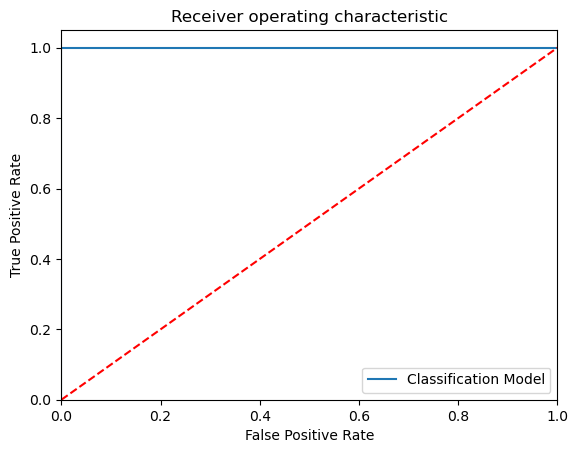

-----------------------------------------------------------------------------------------------------


In [64]:
# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create model object

ModelRF = RandomForestClassifier()
#ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
#                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
#                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
#                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data 

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [66]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\2nd YEAR\Downloads\HTResults.csv", header=0)

CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[9592    0]
 [   0  639]]
Outcome values : 
 9592 0 0 639
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9592
           0       1.00      1.00      1.00       639

    accuracy                           1.00     10231
   macro avg       1.00      1.00      1.00     10231
weighted avg       1.00      1.00      1.00     10231

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


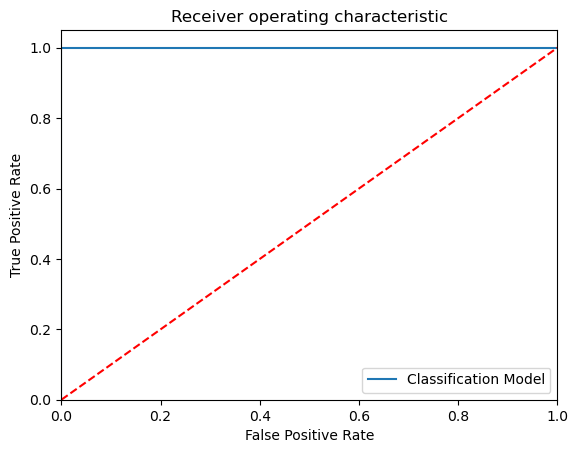

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[9592    0]
 [   0  639]]
Outcome values : 
 9592 0 0 639
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9592
           0       1.00      1.00      1.00       639

    accuracy                           1.00     10231
   macro avg       1.00      1.00      1.00     10231
weighted avg       1.00      1.00      1.00     10231

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


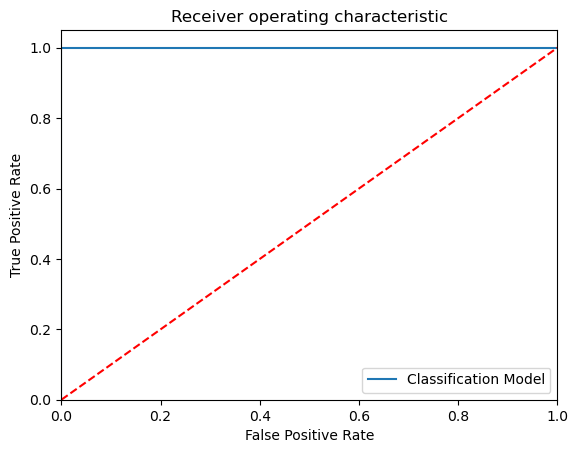

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[9592    0]
 [   0  639]]
Outcome values : 
 9592 0 0 639
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9592
           0       1.00      1.00      1.00       639

    accuracy                           1.00     10231
   macro avg       1.00      1.00      1.00     10231
weighted avg       1.00      1.00      1.00     10231

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


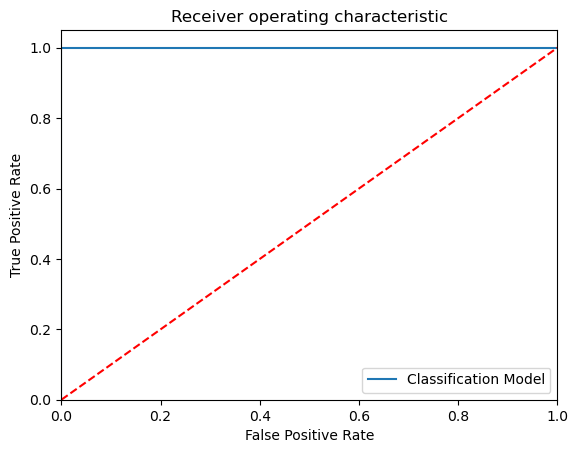

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[9592    0]
 [   0  639]]
Outcome values : 
 9592 0 0 639
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9592
           0       1.00      1.00      1.00       639

    accuracy                           1.00     10231
   macro avg       1.00      1.00      1.00     10231
weighted avg       1.00      1.00      1.00     10231

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
roc_auc_score: 1.0


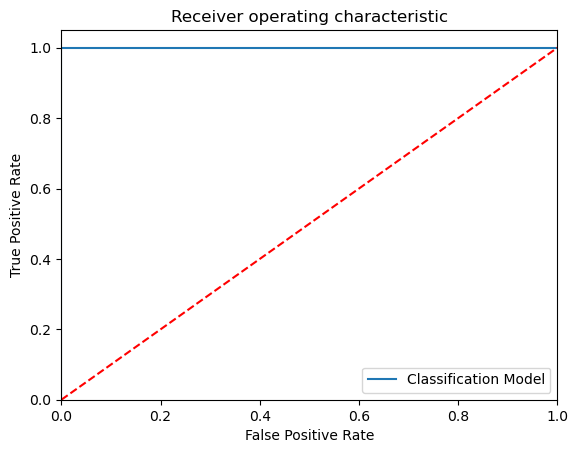

-----------------------------------------------------------------------------------------------------


In [67]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()

# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [68]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),9592,0,0,639,1.0,1.0,1.0,1.0,1.0,MCC,1.0,1.0
1,DecisionTreeClassifier(),9592,0,0,639,1.0,1.0,1.0,1.0,1.0,MCC,1.0,1.0
2,"(DecisionTreeClassifier(max_features='auto', r...",9592,0,0,639,1.0,1.0,1.0,1.0,1.0,MCC,1.0,1.0
3,"(ExtraTreeClassifier(random_state=1573503633),...",9592,0,0,639,1.0,1.0,1.0,1.0,1.0,MCC,1.0,1.0


In [73]:
# Load the Hyperparameter tunining result dataset

HTResults = pd.read_csv(r"C:\Users\2nd YEAR\Downloads\HTResults.csv", header=0)
HTResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


In [69]:
# Hyperparameter tuning by GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
GS_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5, 6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create object for model

ModelRF2 = RandomForestClassifier()

# Instantiate the grid search model

Grid_search = GridSearchCV(estimator = ModelRF2, param_grid = GS_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data

Grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [70]:
# Best parameter from gridseachCV

Grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [71]:
# Display of best parameter

best_grid = Grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=3)

Confusion matrix : 
 [[9592    0]
 [   0  639]]
Outcome values : 
 9592 0 0 639
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9592
           0       1.00      1.00      1.00       639

    accuracy                           1.00     10231
   macro avg       1.00      1.00      1.00     10231
weighted avg       1.00      1.00      1.00     10231

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 1.0
roc_auc_score: 1.0


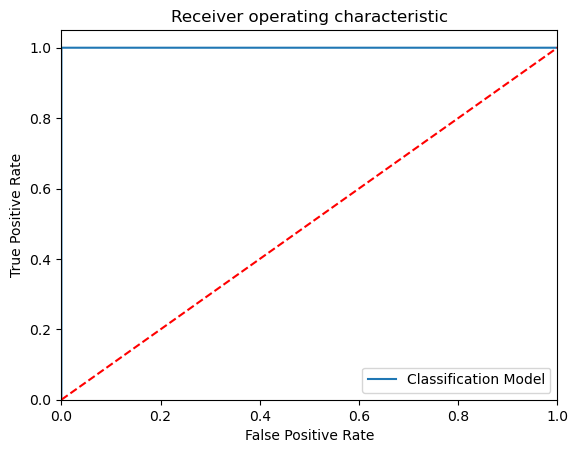

-----------------------------------------------------------------------------------------------------


In [74]:
# To build the 'RandomForestClassifier' model with random sampling with Hyperparametr tuning with gridseachCV

from sklearn.ensemble import RandomForestClassifier

ModelRF3 = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=10, min_samples_split=3,
                                  min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='log2', 
                                  max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=False, oob_score=False, 
                                  n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, 
                                  ccp_alpha=0.0, max_samples=None)

# Train the model with train data

ModelRF3.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF3.predict(x_test)
y_pred_prob = ModelRF3.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF3.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#----------------------------------------------------------------------------------------------------------
new_row = {'Model Name' : ModelRF3,
           'True_Positive': tp,
           'False_Negative': fn, 
           'False_Positive': fp, 
           'True_Negative': tn,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(actual, predicted),
           'Balanced Accuracy':balanced_accuracy}
HTResults = HTResults.append(new_row, ignore_index=True)
#----------------------------------------------------------------------------------------------------------

In [75]:
HTResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,"(DecisionTreeClassifier(max_depth=10, max_feat...",9592,0,0,639,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
